In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


<Axes: ylabel='count'>

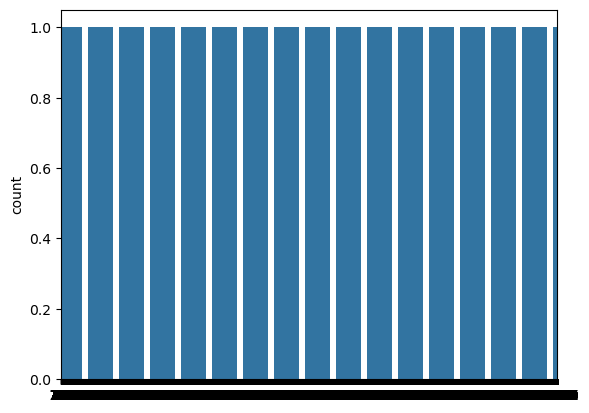

In [3]:
sns.countplot(y_train)

In [4]:
np.isnan(x_train).any()

False

In [5]:
np.isnan(x_test).any()

False

In [6]:
input_shape = (28, 28, 1)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

In [7]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


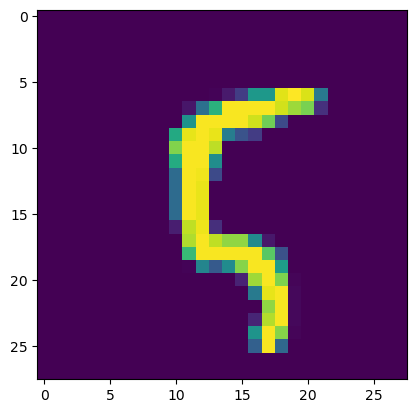

In [8]:
plt.imshow(x_train[100][:,:,0])
print(y_train[100])

In [9]:
batch_size = 64
num_classes = 10
epochs = 5

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

D:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [12]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 48ms/step - acc: 0.8458 - loss: 0.4759 - val_acc: 0.9878 - val_loss: 0.0425
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 38s 45ms/step - acc: 0.9789 - loss: 0.0761 - val_acc: 0.9920 - val_loss: 0.0333
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 38s 45ms/step - acc: 0.9823 - loss: 0.0602 - val_acc: 0.9908 - val_loss: 0.0308
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 46ms/step - acc: 0.9854 - loss: 0.0493 - val_acc: 0.9922 - val_loss: 0.0318
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 38s 45ms/step - acc: 0.9864 - loss: 0.0465 - val_acc: 0.9930 - val_loss: 0.0282


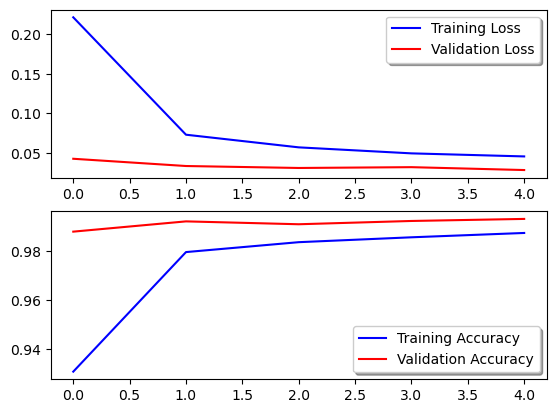

In [18]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - acc: 0.9919 - loss: 0.0278


In [21]:
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


<Axes: >

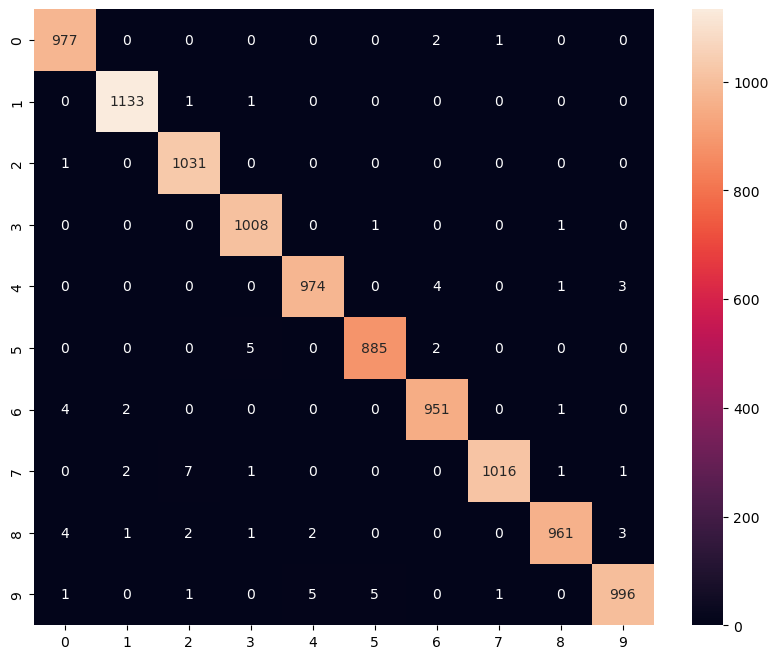

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')